In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from matplotlib import pyplot as plt

import mlflow
import mlflow.sklearn

In [20]:
credito = pd.read_csv('Credit.csv')

In [21]:
credito.shape

(1000, 21)

Transformando colunas categóricas em numéricas

In [22]:
for col in credito.columns:
    if credito[col].dtype == 'object':
        credito[col] = pd.Categorical(credito[col]).codes

In [23]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state= 123)

2025/01/17 11:40:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


555ef9ee2fcf4888b0adc1a8c8d739ba


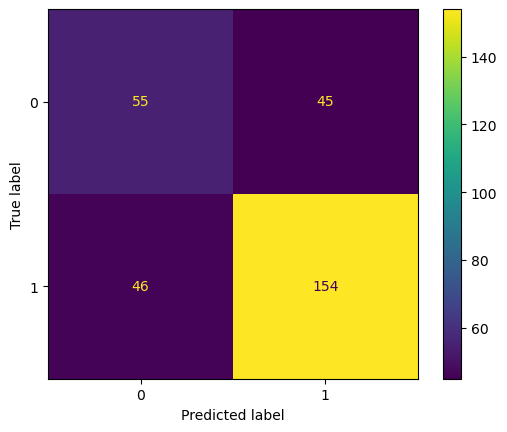

In [25]:
mlflow.set_experiment('naive_bayes_exp')
with mlflow.start_run():
  naive_bayes = GaussianNB()
  naive_bayes.fit(X_train, y_train)
  previsoes = naive_bayes.predict(X_test)

  #métrica
  acuracia = accuracy_score(y_test, previsoes)
  recall = recall_score(y_test, previsoes)
  precisao = precision_score(y_test, previsoes)
  f1 = f1_score(y_test, previsoes)
  auc = roc_auc_score(y_test, previsoes)
  log = log_loss(y_test, previsoes)

  #registrando a métrica
  mlflow.log_metric('acuracia', acuracia)
  mlflow.log_metrics({'recall': recall, 'precisao': precisao, 'f1': f1, 'auc': auc, 'log': log})

  # Gráficos
  confusion = ConfusionMatrixDisplay.from_estimator(naive_bayes, X_test, y_test)
  plt.savefig('confusion.png')
  roc = RocCurveDisplay.from_estimator(naive_bayes, X_test, y_test)
  plt.savefig('roc.png')
  plt.close()

  #registrando os gráficos
  mlflow.log_artifact('confusion.png')
  mlflow.log_artifact('roc.png')

  #registrando informaçoões do modelo
  mlflow.set_tag('modelo', 'naive_bayes')
  mlflow.set_tag('dataset', 'credit')

  #registrando o modelo
  mlflow.sklearn.log_model(naive_bayes, 'naive_bayes')
  print(mlflow.active_run().info.run_id)
mlflow.end_run()

Criando um experimento